# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Za'im Shidqi
- Email: muhammad.zaim67@gmail.com
- Id Dicoding: muhammad_zaim_shidqi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan diguankan

In [14]:
ed_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", encoding="utf-8", sep=';'
)
print("Shape of the DataFrame:", ed_df.shape)
print("\nFirst 5 rows of the DataFrame:")
display(ed_df.head())

Shape of the DataFrame: (4424, 37)

First 5 rows of the DataFrame:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [15]:
ed_df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [16]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [17]:
numerical_columns = ed_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = ed_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
Categorical columns: ['Status']


### 1. Univariate Analysis


In [18]:
ed_df[numerical_columns].describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### 2. Univariate Analysis


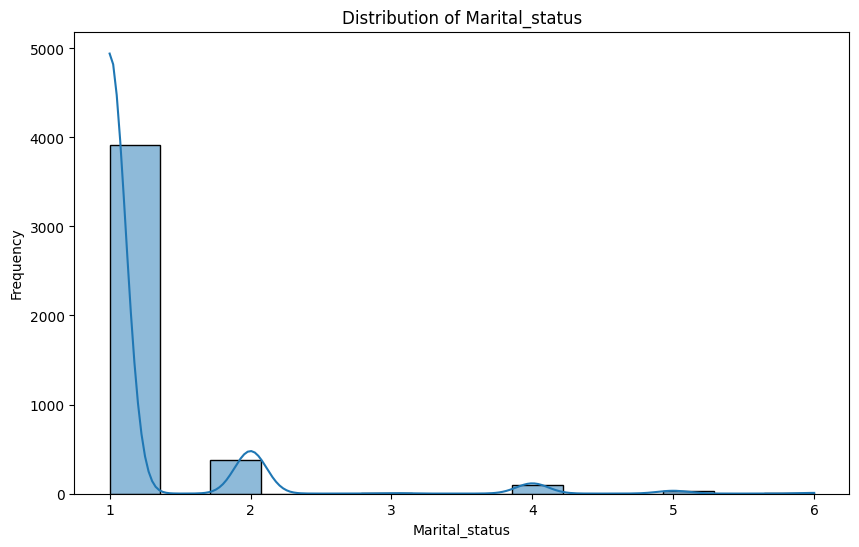

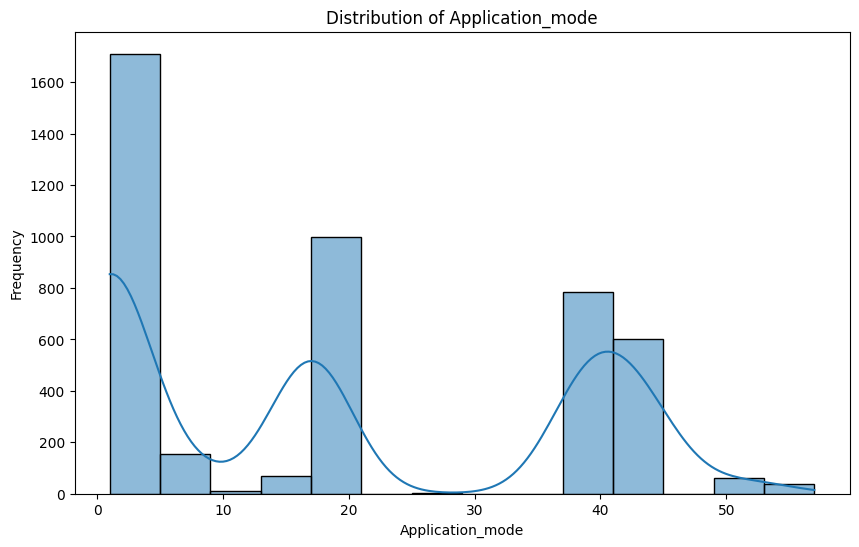

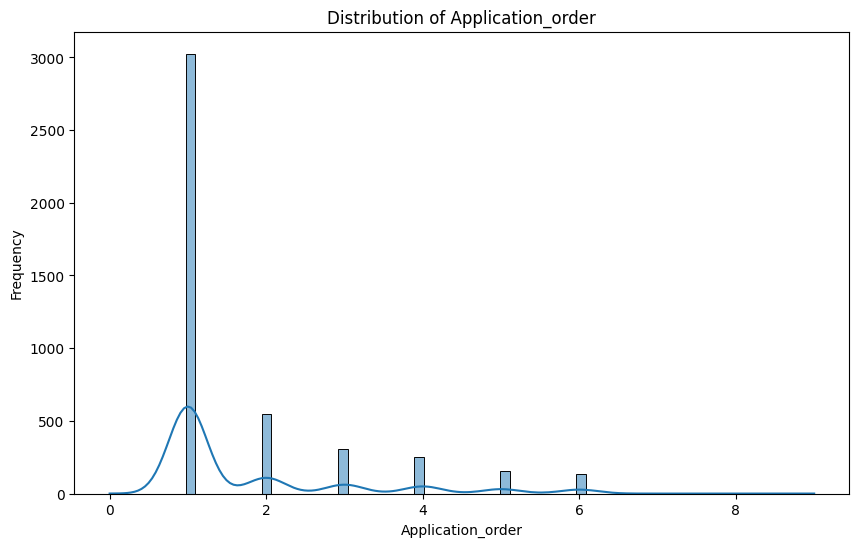

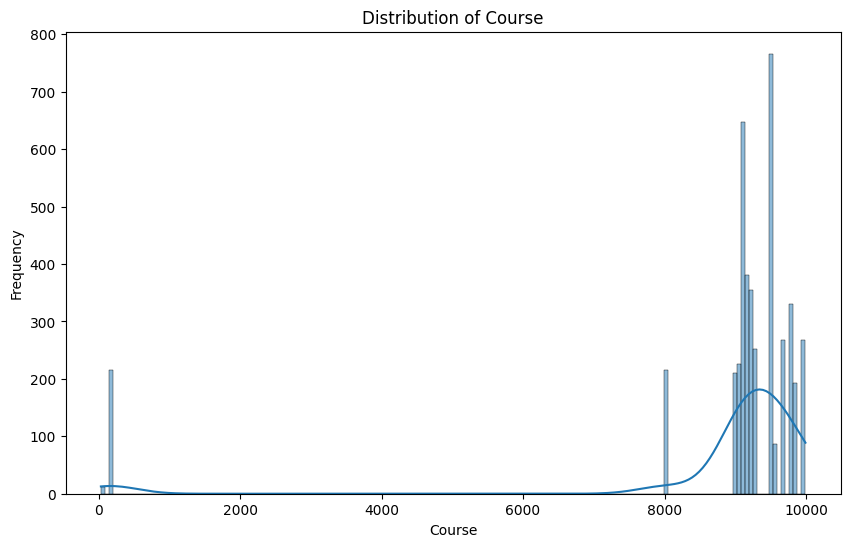

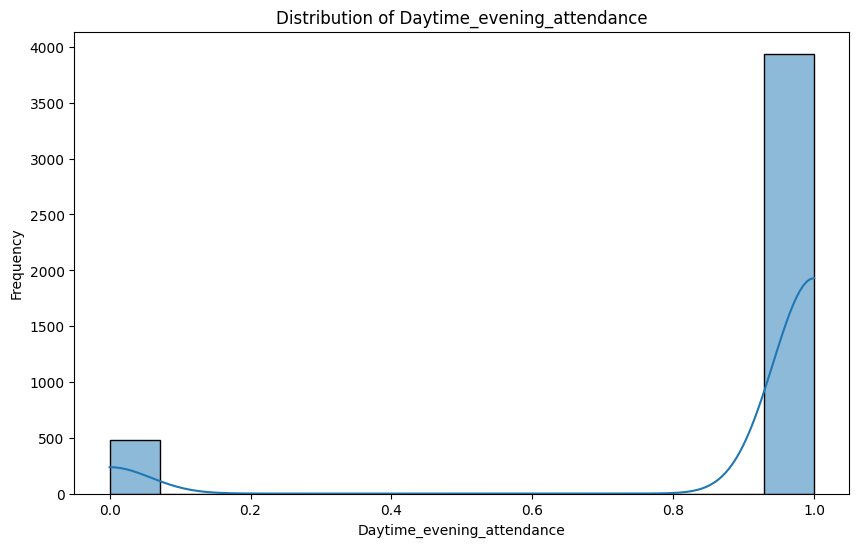

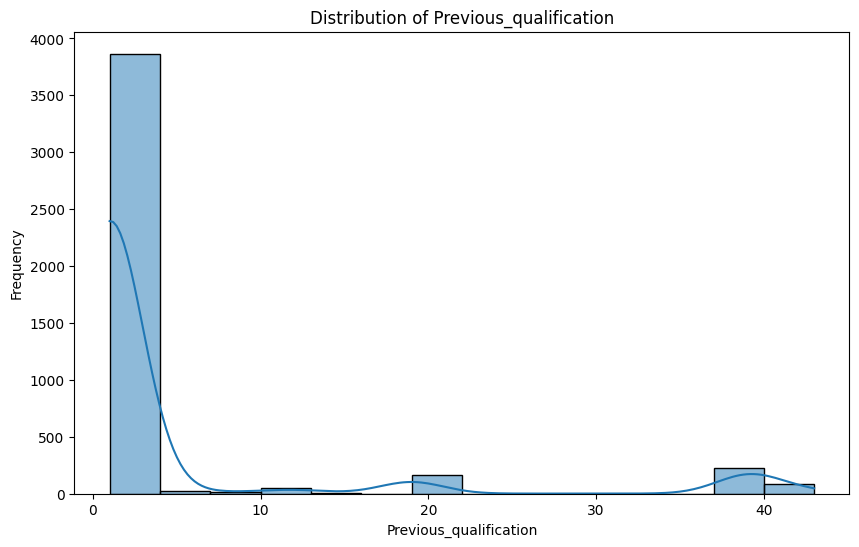

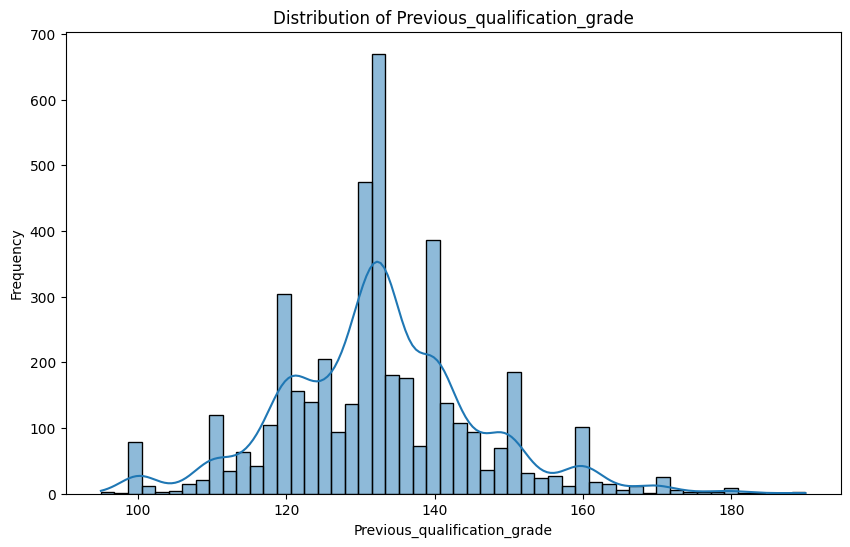

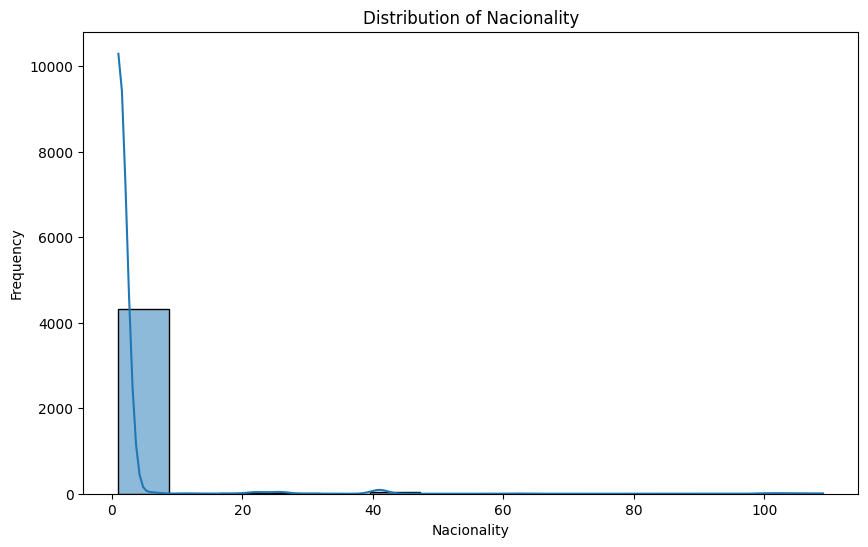

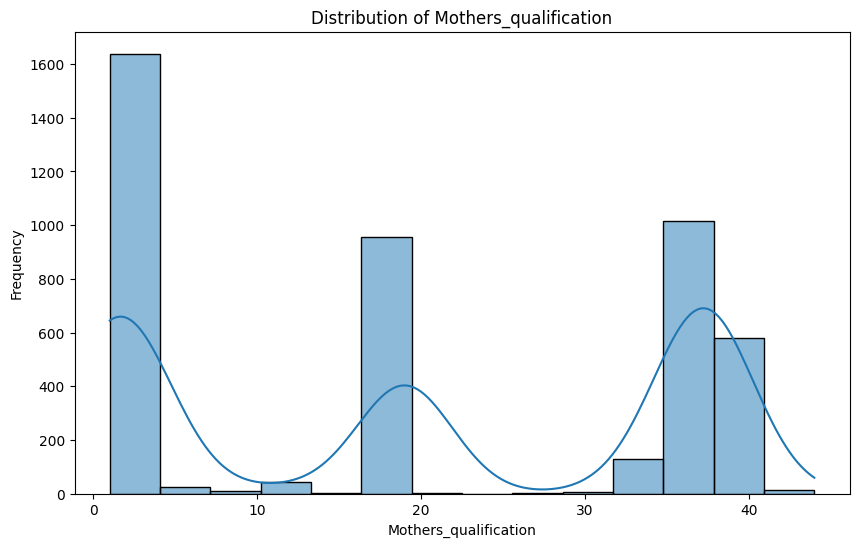

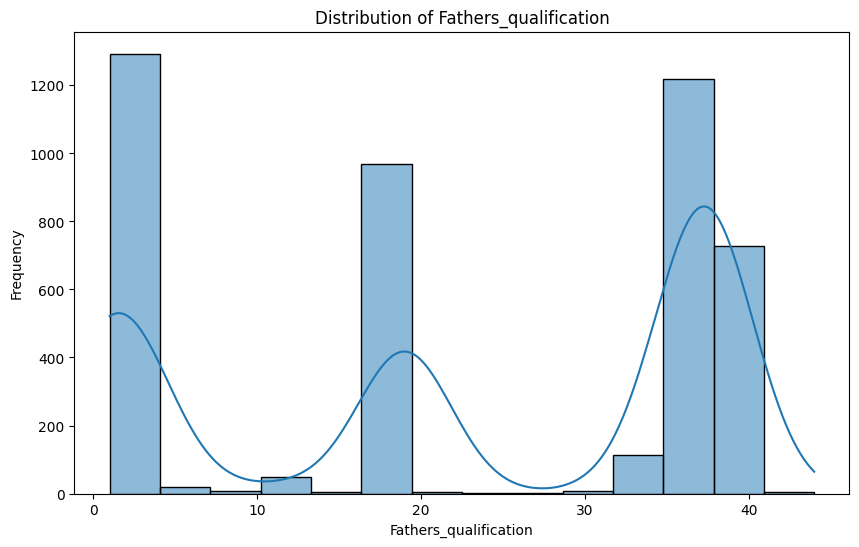

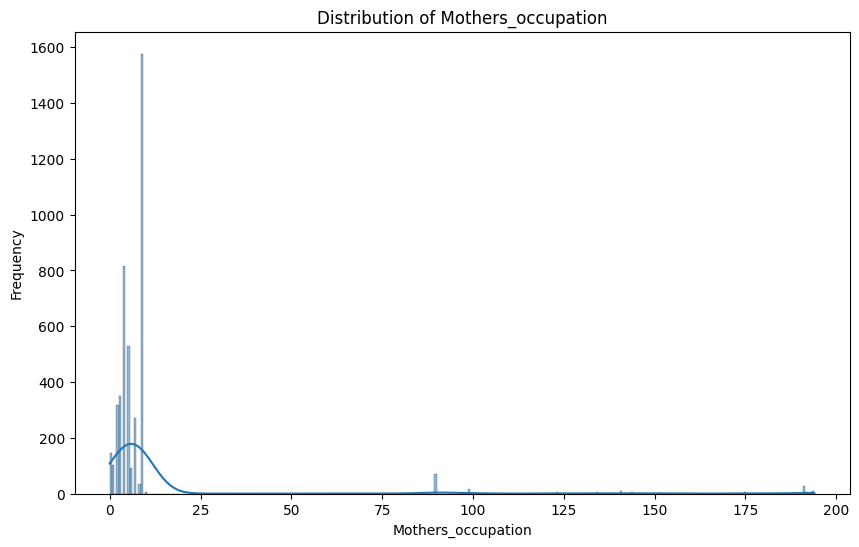

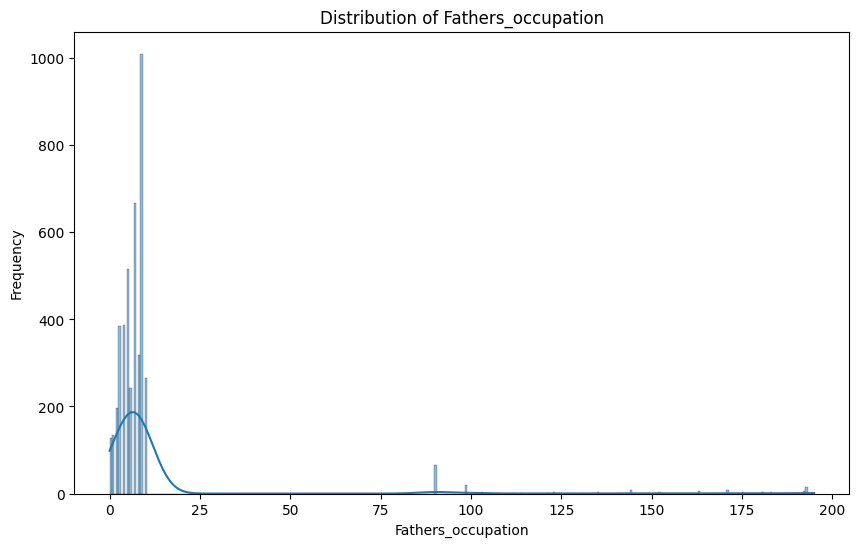

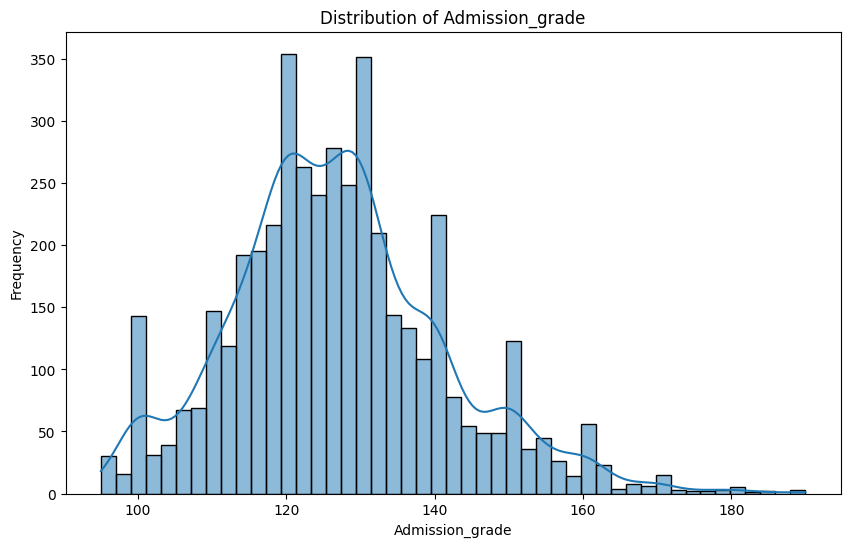

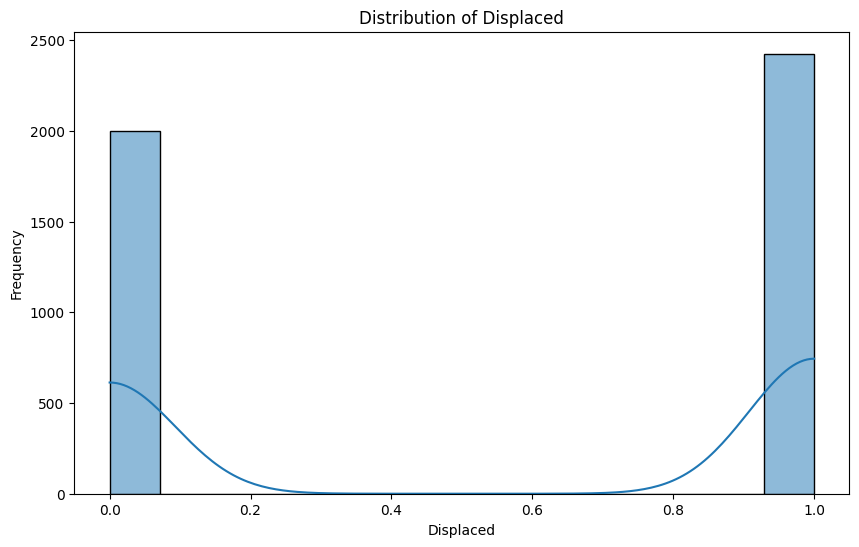

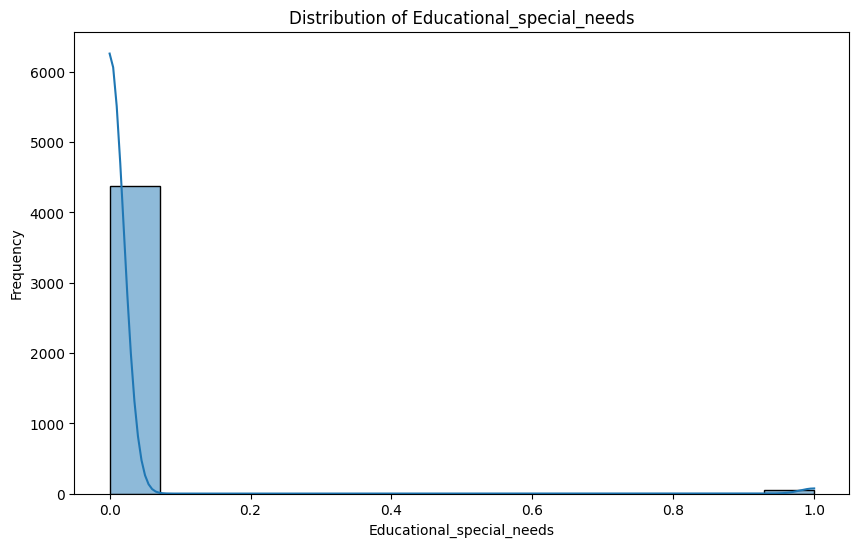

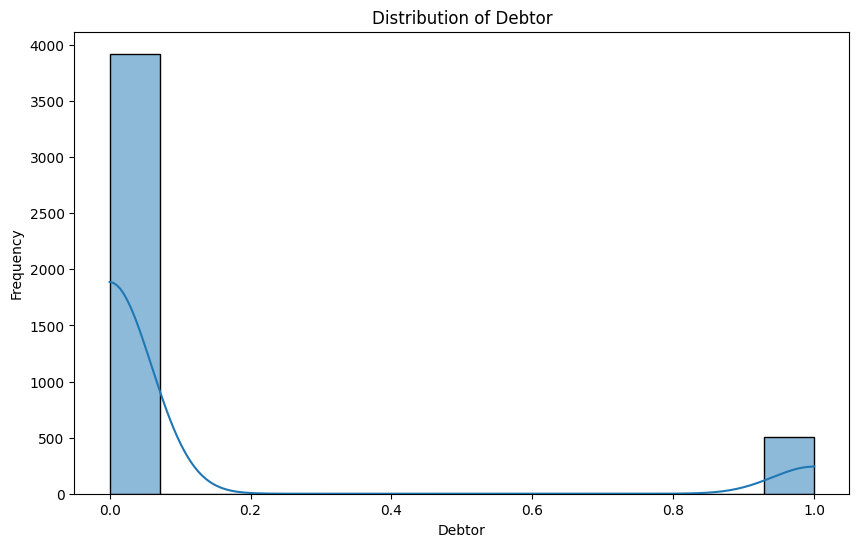

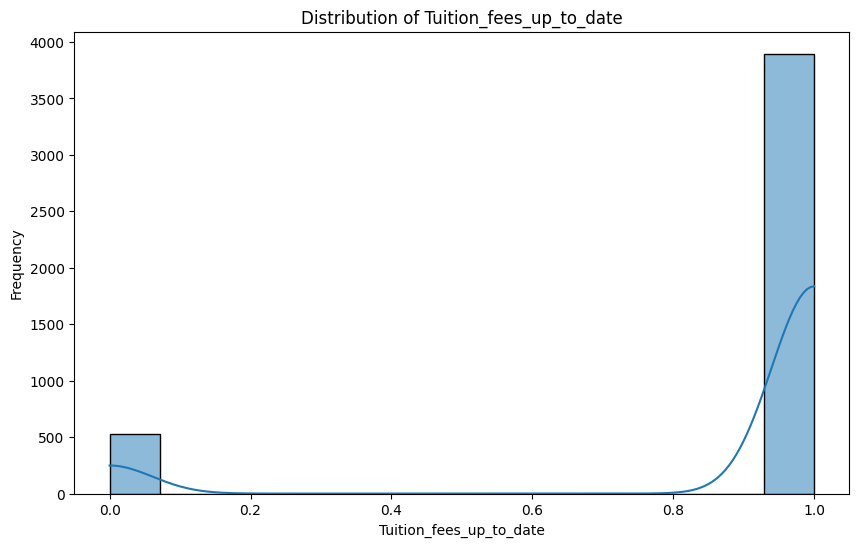

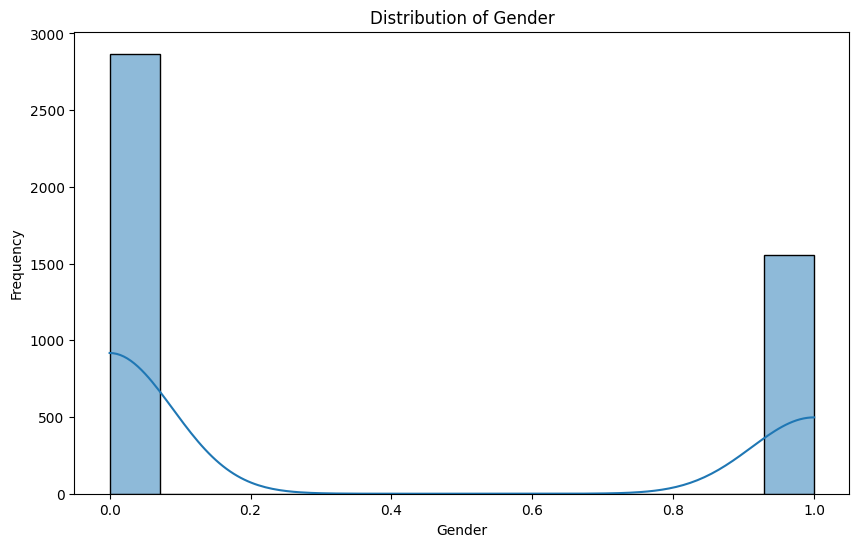

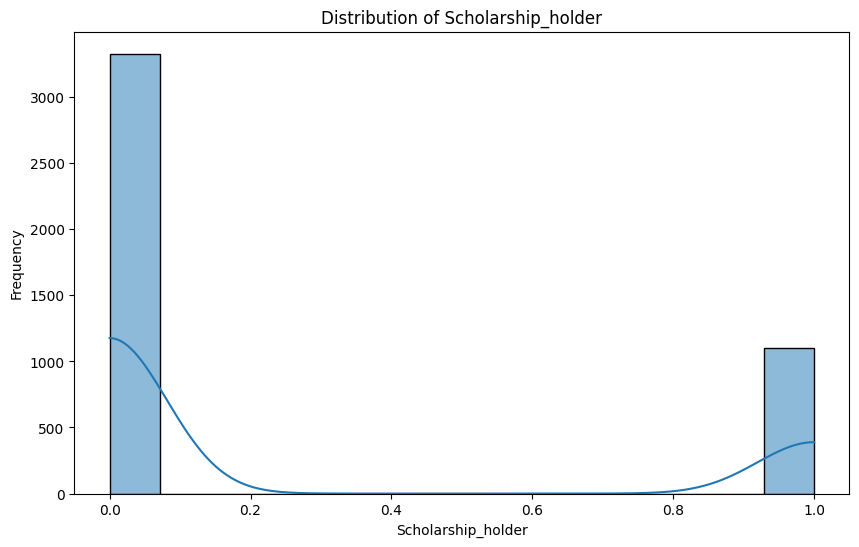

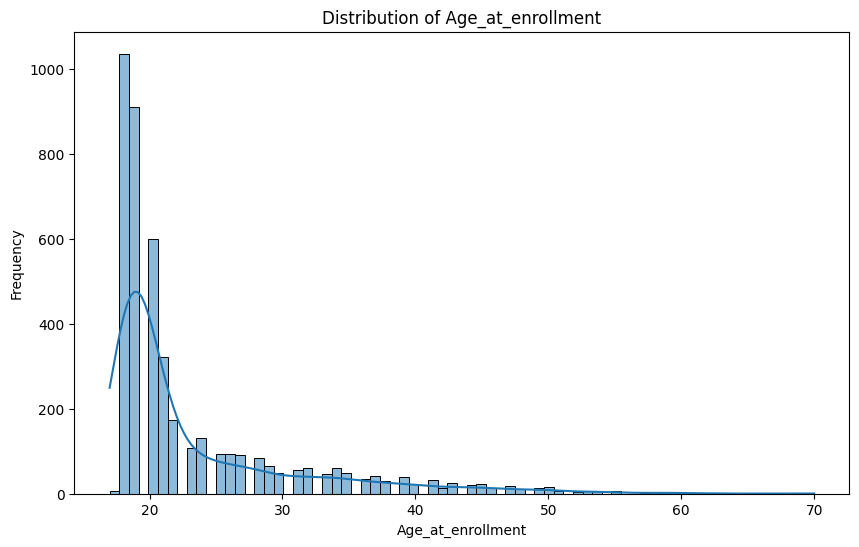

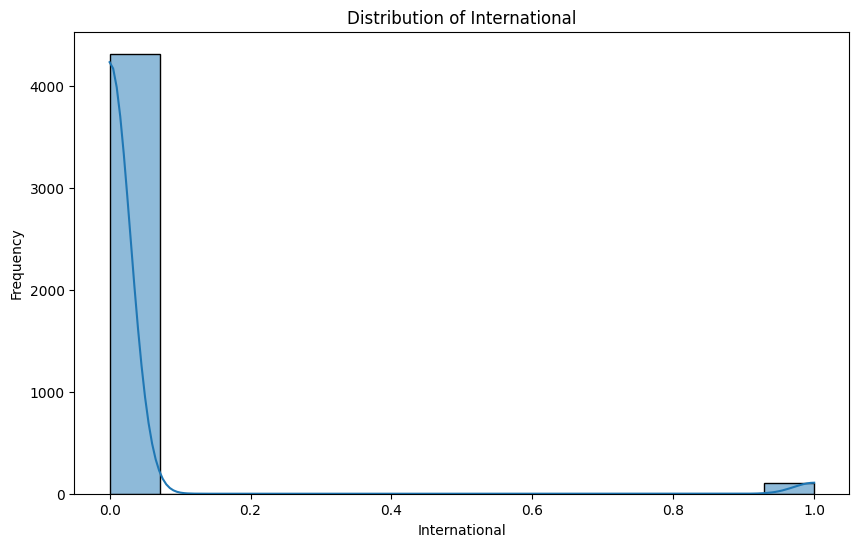

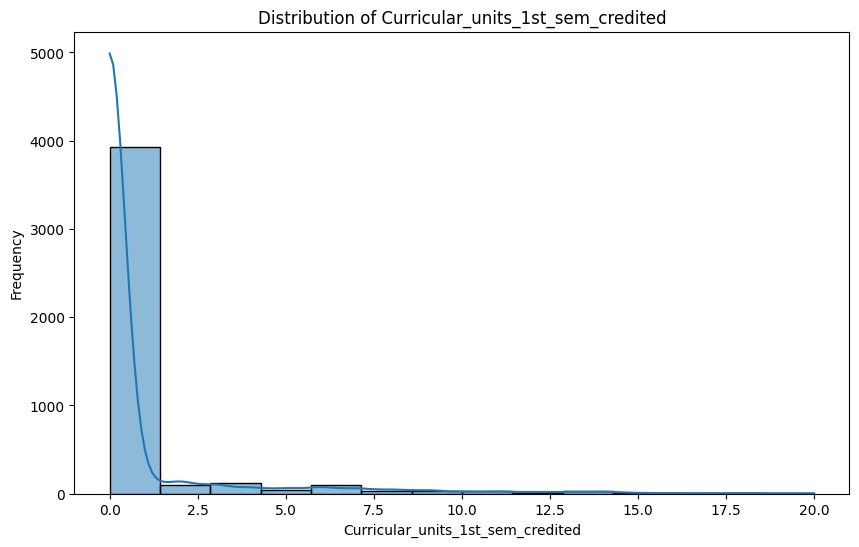

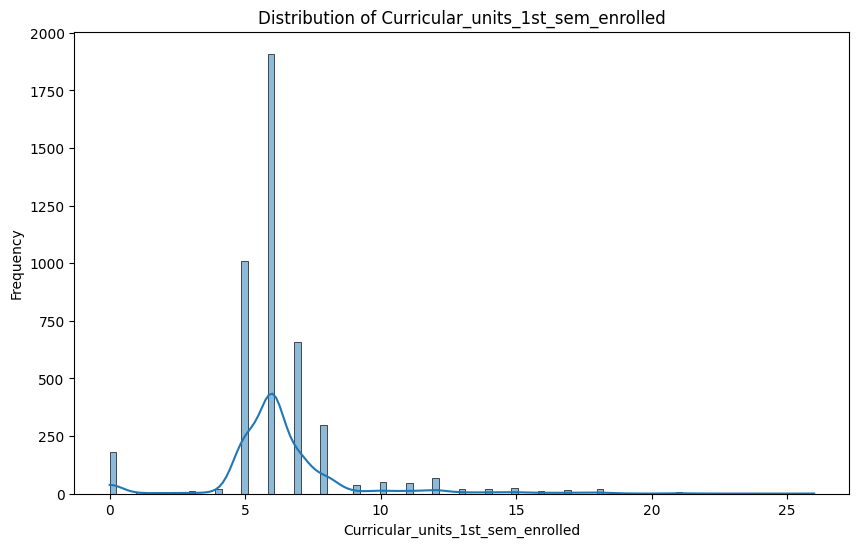

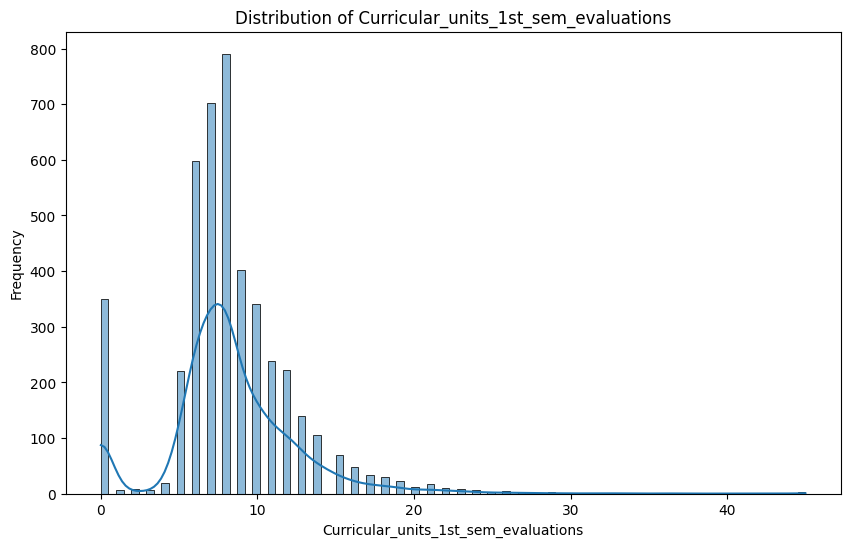

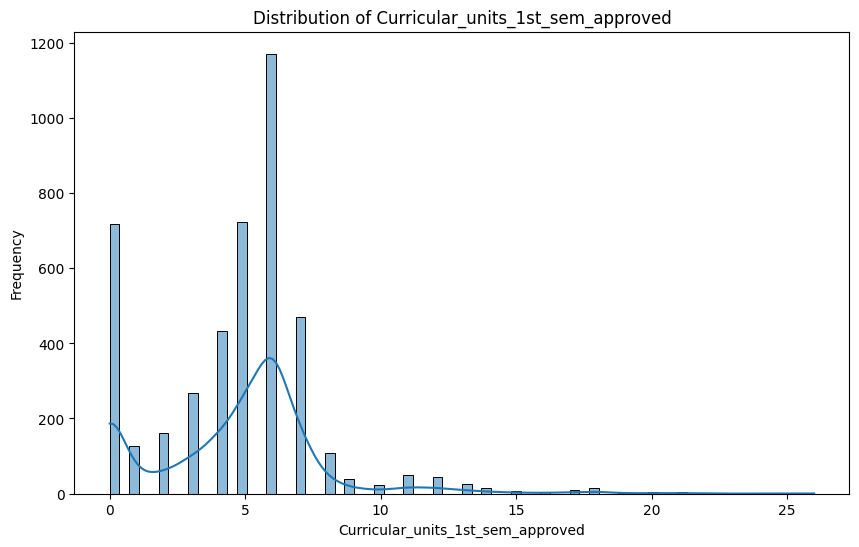

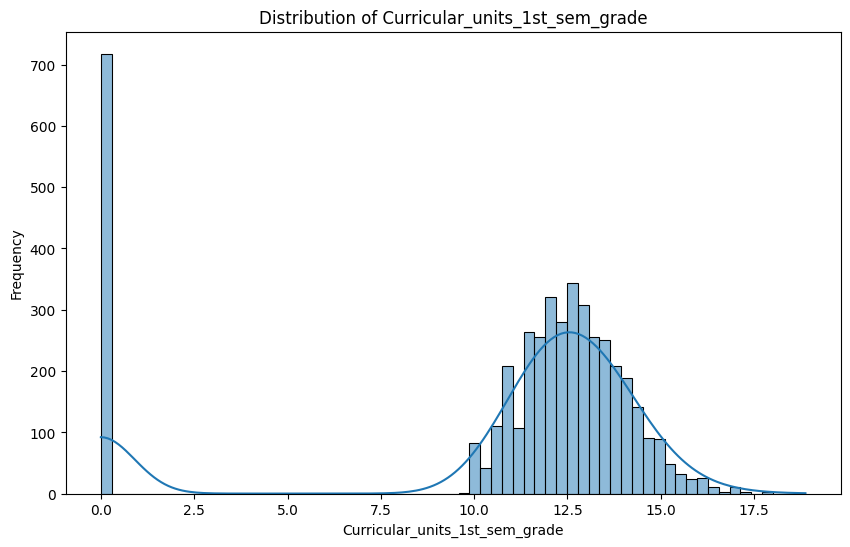

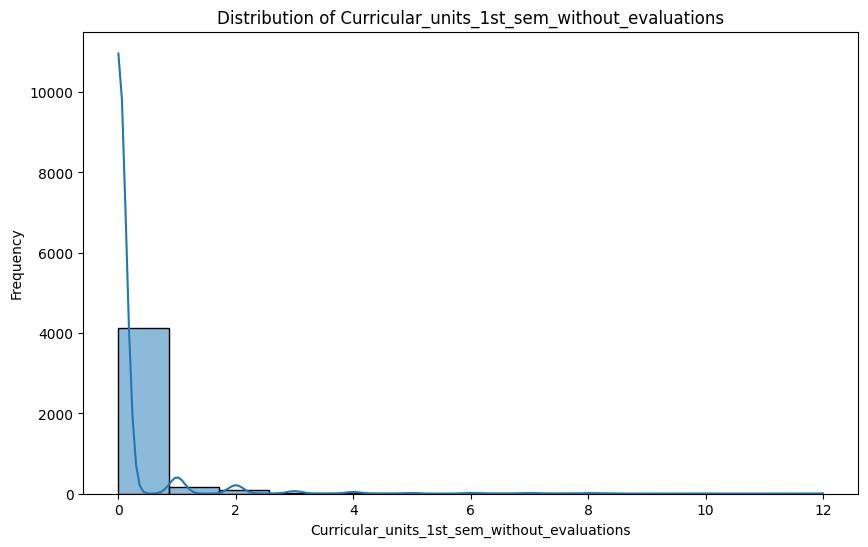

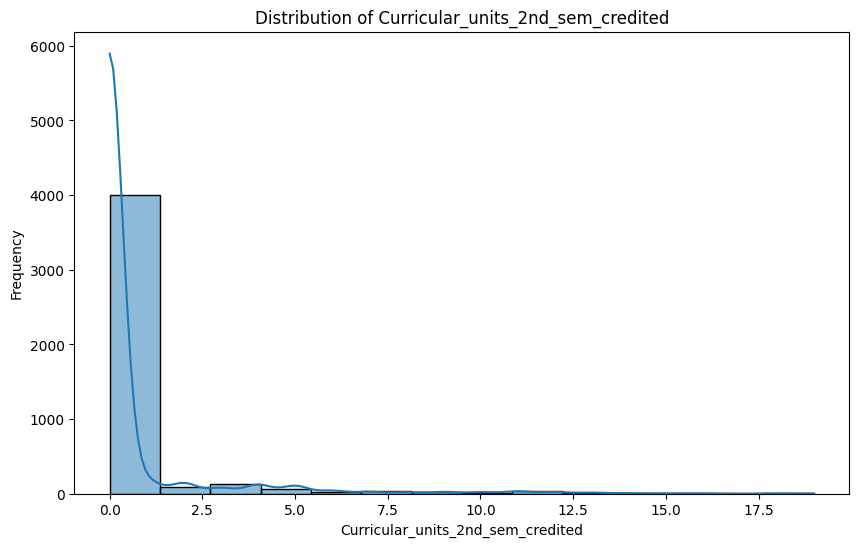

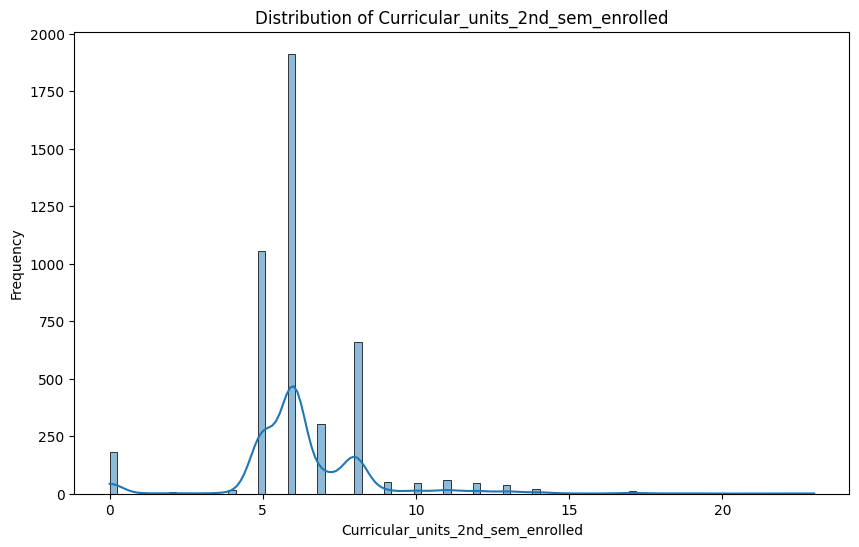

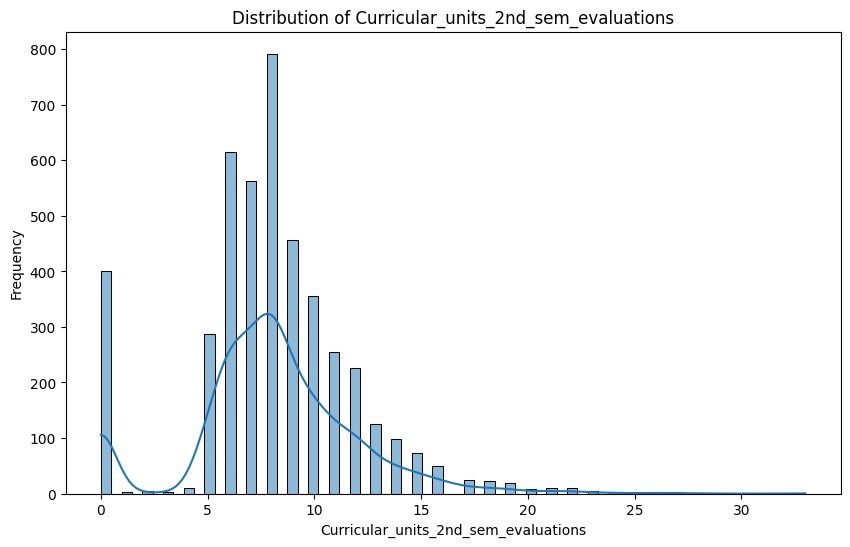

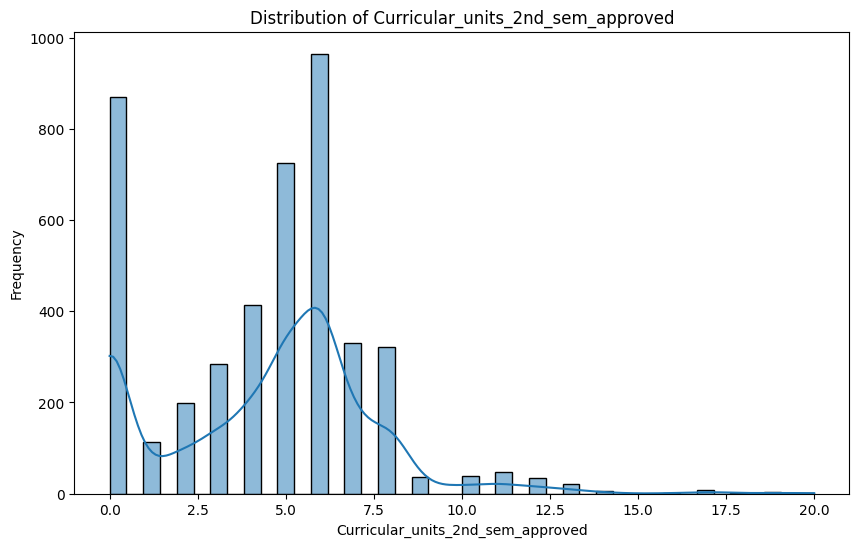

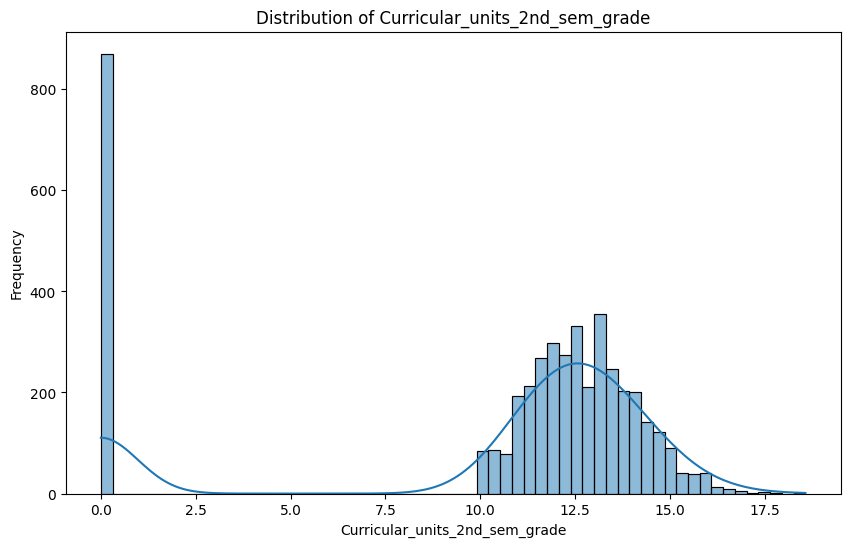

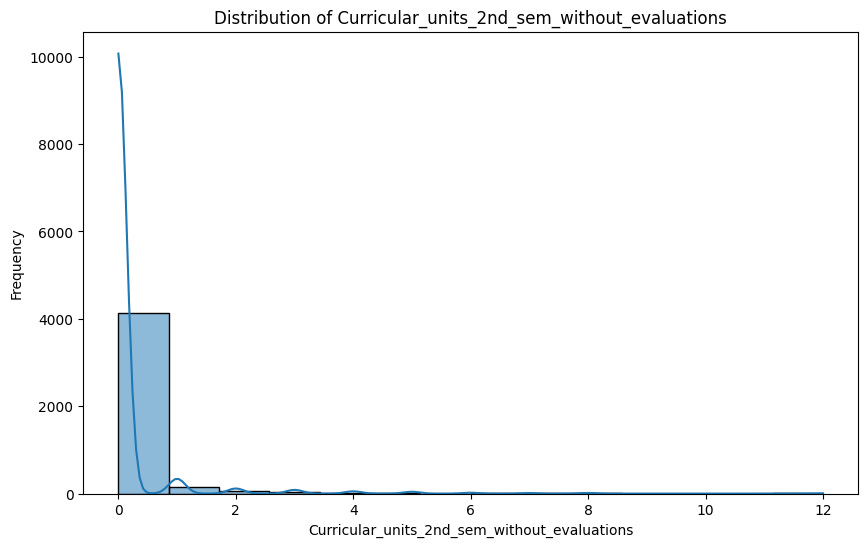

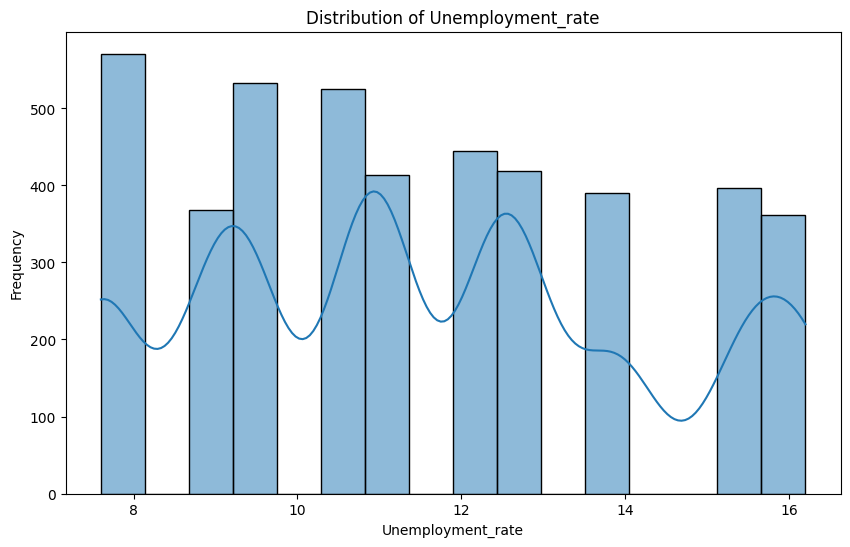

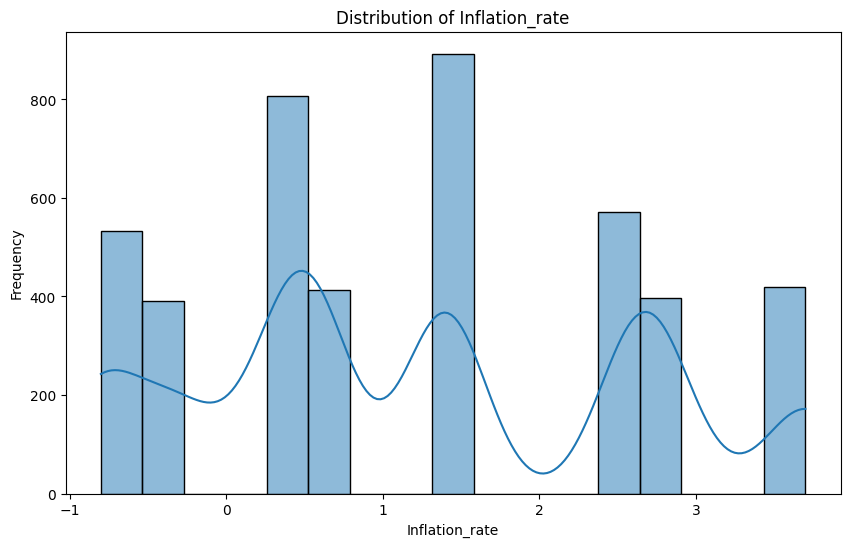

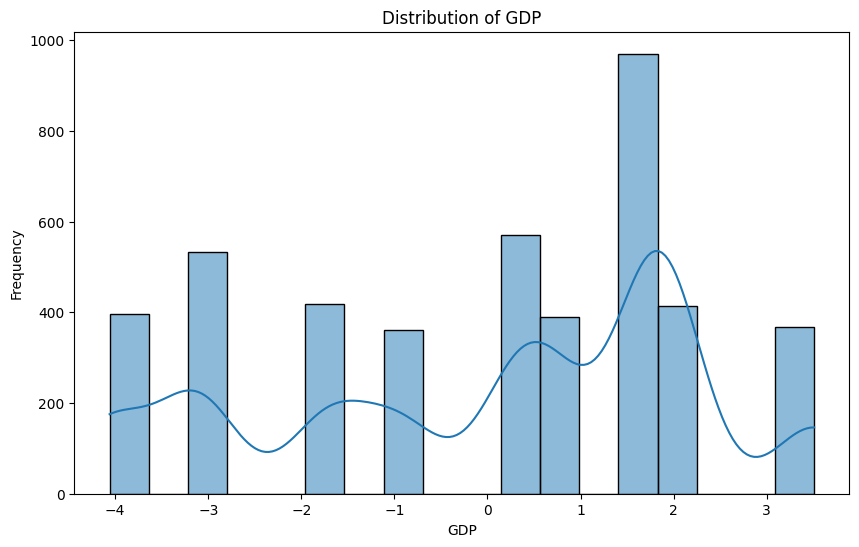

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(ed_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 3. Multivariate Analysis


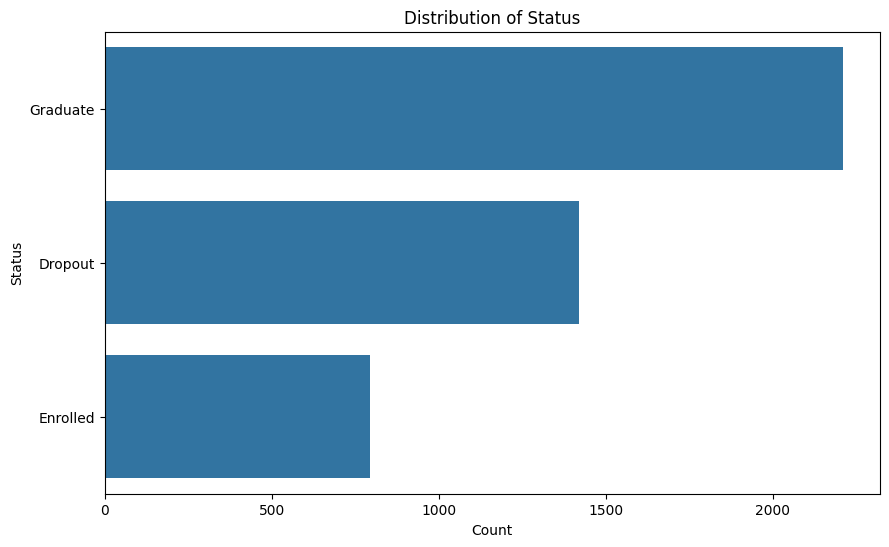

In [20]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    count = ed_df[col].value_counts()
    # Jika terlalu banyak kategori, hanya tampilkan top 10
    if len(count) > 10:
        count = count.head(10)
        plt.title(f'Top 10 - Distribution of {col}')
    else:
        plt.title(f'Distribution of {col}')
    sns.countplot(y=col, data=ed_df, order=count.index)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### 4. Analisis dropout


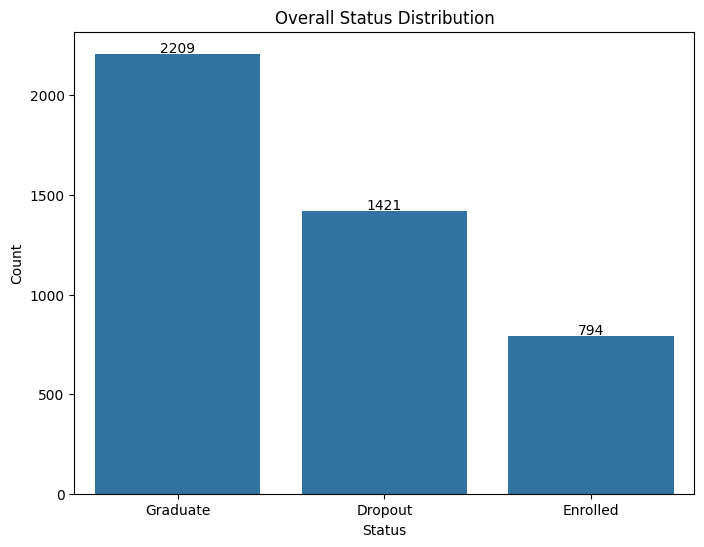

Status Percentage:
Graduate: 49.93%
Dropout: 32.12%
Enrolled: 17.95%


In [21]:
plt.figure(figsize=(8, 6))
Status_counts = ed_df['Status'].value_counts()
sns.barplot(x=Status_counts.index, y=Status_counts.values)
plt.title('Overall Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
for i, count in enumerate(Status_counts.values):
    plt.text(i, count + 5, str(count), ha='center')
plt.show()

# Persentase Status
Status_percentage = hr_df['Status'].value_counts(normalize=True) * 100
print("Status Percentage:")
for category, percentage in Status_percentage.items():
    print(f"{category}: {percentage:.2f}%")

## Data Preparation / Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Check the target variable distribution
print("Status distribution:")
print(ed_df['Status'].value_counts())
print("\nStatus percentage:")
print(ed_df['Status'].value_counts(normalize=True) * 100)

# Separate features and target
X = ed_df.drop('Status', axis=1)
y = ed_df['Status']

# Handle categorical variables - encode them
label_encoders = {}
categorical_features = X.select_dtypes(include=['object']).columns

for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values if any
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set status distribution:\n{y_train.value_counts()}")

Status distribution:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Status percentage:
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

Training set shape: (3539, 36)
Test set shape: (885, 36)
Training set status distribution:
Status
Graduate    1767
Dropout     1137
Enrolled     635
Name: count, dtype: int64


## Modeling

In [23]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")

    # Train the model
    if name == 'Random Forest':
        model.fit(X_train, y_train)
    else:
        model.fit(X_train_scaled, y_train)

    # Make predictions
    if name == 'Random Forest':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    if name == 'Random Forest':
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find the best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['accuracy'])
best_model = model_results[best_model_name]['model']

print(f"\n{'='*50}")
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {model_results[best_model_name]['accuracy']:.4f}")


Training Random Forest...
Test Accuracy: 0.7672
Cross-validation Score: 0.7782 (+/- 0.0248)

Training Logistic Regression...
Test Accuracy: 0.7684
Cross-validation Score: 0.7652 (+/- 0.0182)

Training SVM...
Test Accuracy: 0.7582
Cross-validation Score: 0.7567 (+/- 0.0180)

Best Model: Logistic Regression
Best Accuracy: 0.7684


## Evaluation

Detailed Evaluation for Logistic Regression

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885



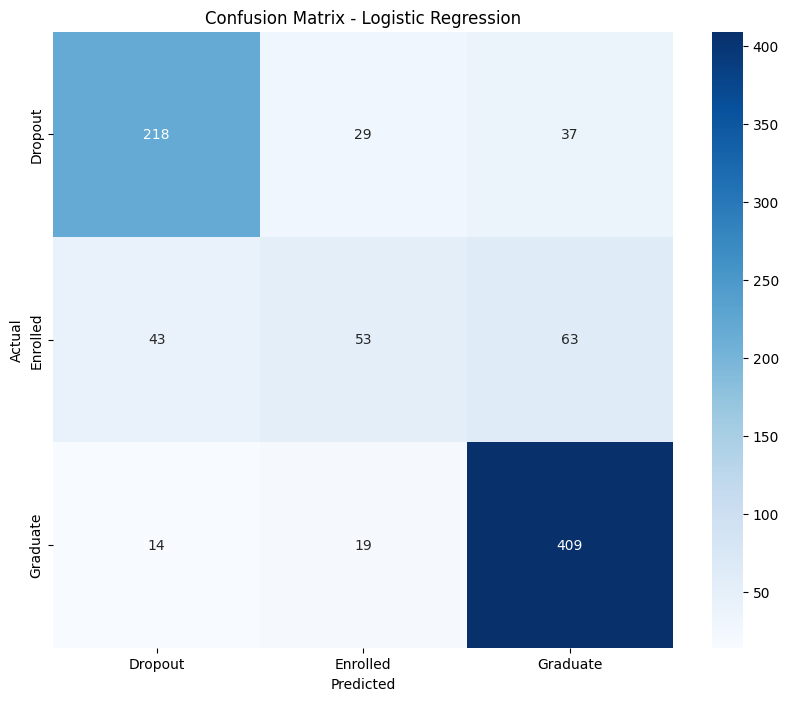

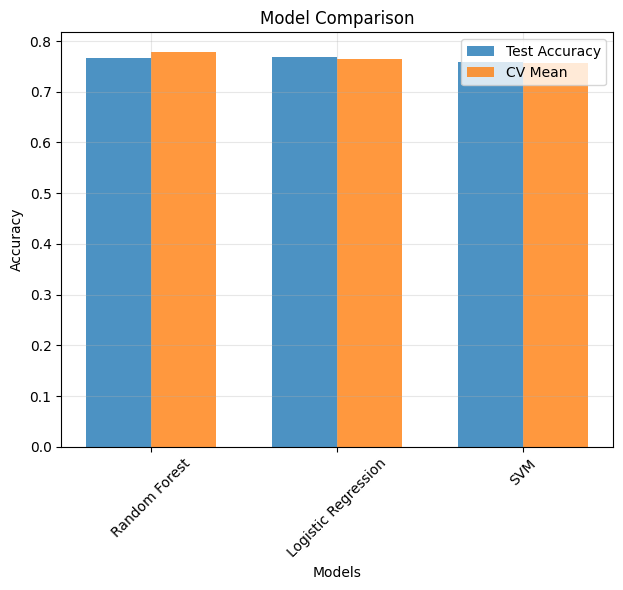


SUMMARY
Dataset Shape: (4424, 37)
Target Classes: ['Dropout', 'Enrolled', 'Graduate']
Best Model: Logistic Regression
Best Test Accuracy: 0.7684
Best CV Score: 0.7652

RECOMMENDATIONS
✅ Model performance is good (>75% accuracy)


In [24]:
# Detailed evaluation of the best model
print(f"Detailed Evaluation for {best_model_name}")
print("="*50)

best_predictions = model_results[best_model_name]['predictions']

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model comparison
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]
cv_means = [model_results[name]['cv_mean'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Test Accuracy', alpha=0.8)
plt.bar(x + width/2, cv_means, width, label='CV Mean', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Feature importance (for Random Forest)
if best_model_name == 'Random Forest':
    plt.subplot(1, 2, 2)
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    # Get top 10 features
    top_features_idx = np.argsort(feature_importance)[-10:]
    top_features = [feature_names[i] for i in top_features_idx]
    top_importance = feature_importance[top_features_idx]

    plt.barh(range(len(top_features)), top_importance)
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importance')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'='*60}")
print("SUMMARY")
print(f"{'='*60}")
print(f"Dataset Shape: {ed_df.shape}")
print(f"Target Classes: {list(best_model.classes_)}")
print(f"Best Model: {best_model_name}")
print(f"Best Test Accuracy: {model_results[best_model_name]['accuracy']:.4f}")
print(f"Best CV Score: {model_results[best_model_name]['cv_mean']:.4f}")

# Recommendations
print(f"\n{'='*60}")
print("RECOMMENDATIONS")
print(f"{'='*60}")
if model_results[best_model_name]['accuracy'] > 0.85:
    print("✅ Model performance is excellent (>85% accuracy)")
elif model_results[best_model_name]['accuracy'] > 0.75:
    print("✅ Model performance is good (>75% accuracy)")
else:
    print("⚠️  Model performance could be improved")
    print("Consider:")
    print("- Feature engineering")
    print("- Hyperparameter tuning")
    print("- Trying ensemble methods")
    print("- Collecting more data")